## OpenMP Trace Investigation

The goal of this investigation is to determine how to extract load information from `OpenMP` traces (generated with [`ScoreP`](http://www.vi-hps.org/projects/score-p/)) correctly. The application used in this report, `floorplan`, was obtained from the [Barcelona OpenMP Task Suite](https://pm.bsc.es/projects/bots).

First, the Julia modules that will be needed should be imported. 

In [2]:
using DataFrames
using Gadfly
using YAJP

In the cell bellow, the _tied tasks_ version of the application is parsed, according to `floorplan.yaml` (shown right after).

In [5]:
fp = trace("floorplan.csv", "floorplan.yaml")

Trace holding 4 Containers, 8509 kept Events, and 0 discarded Events.

In [4]:
for l in readall("floorplan.yaml")
    print(l)
end

containers:
    - THREAD
states:
    - STATE
keep:
    - "!$omp create task @floorplan.c:530 <3>"
    - "!$omp task @floorplan.c:530 <4>"
    - "!$omp atomic @floorplan.c:572 <7>"
    - "!$omp critical @floorplan.c:560 <5>"
    - "!$omp critical sblock @floorplan.c:560 <6>"
    - "!$omp parallel @floorplan.c:620 <9>"
    - "!$omp single @floorplan.c:622 <11>"
    - "!$omp single sblock @floorplan.c:622 <12>"
# discard:
# ignored:
    # "!$omp taskwait @floorplan.c:584 <8>"
    # "!$omp implicit barrier @floorplan.c:626 <13>"
    # "!$omp implicit barrier @floorplan.c:628 <10>"


The yaml file says to `YAJP` that it should consider all containers of type `THREAD`. Also, the file determines that within those containers, states of type `STATE` that are listed either in `keep` or in `discard` are the only types to be considered (i.e. parsed). When determining the load, _kept_ events are added and _discard_ events are subtracted. It can be seen above that no events are parsed as _discard_. Any line starting with `#` denotes a comment and is not considered by the parser.  

To see if the parsing of the trace promoted above makes sense, the normalized load is plotted. Normalized load values should be within 0 and 1. Hence, if any resource (i.e. thread) posseses a load that is not contained in that range, the parsing is incorrect.

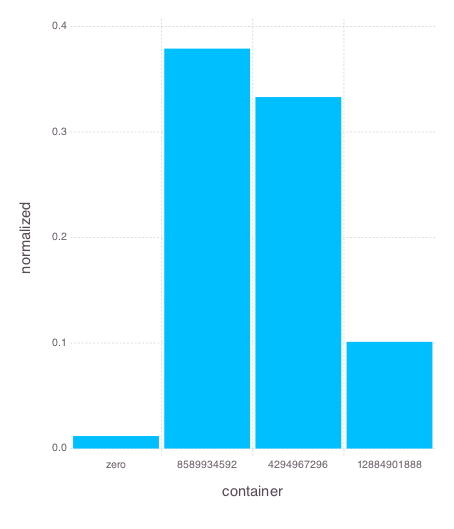

In [6]:
set_default_plot_size(12cm,14cm)
plot(loads(fp), x="container", y="normalized", Geom.bar,
    Theme(bar_spacing=4pt))

Since load values for every are contained within the 0 to 1 range, apparently, the parsing is properly performed.